In [7]:

import numpy as np
import matplotlib.pyplot as plt
import math
import os
import sys
from sys import platform

global SLASH
if platform == "linux" or platform == "linux2":
    # linux
    SLASH = "/"
elif platform == "win32":
    # Windows...
    SLASH = "\\"

# Configurações
image_size = 224  # Tamanho da imagem

# Gerar coordenadas aleatórias para os pontos
y_coords = []
x_coords = []

# counting the steps
i, j = 0, 0
count_step = 0

bound:  1


FileNotFoundError: [Errno 2] No such file or directory: '/home/tommaselli/Documents/IC_NN_Lidar/artificial_data/tags/Artificial_Label_Data5.csv'

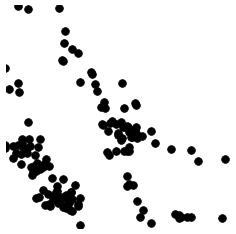

In [8]:

# rotacionar as retas
for angle in range(-25, 26, 10):
    i+=1
    j = 0
    if angle < -15 or angle > 15:
        bound = 1
    else: 
        bound = 1
    print('bound: ', bound)
    while j < bound:
        count_step += 1
        j += 1
        #* ################ DEFINITION ################

        pivot = (np.random.randint(82, 142), 0)
        if pivot[0] < 97 or pivot[0] > 127:
            divider = np.random.randint(70, 90)  # Espaçamento entre as retas
        else: 
            divider = np.random.randint(70, 110)

        # prevent problems with the angle
        if angle < -40 or angle > 40:
            divider -= 20
        
        # prevent problem with zero division
        if angle == 0:
            angle += 1
        
        #* ################ CREATE LINES ################

        # Equação da reta para as retas paralelas VERTICAIS (m = y2 - y1, sendo x2 - x1 = 1 forçado)
        # 
        x1 = image_size // 2 - divider // 2  # Coordenada x para a primeira reta (vertical)
        x2 = image_size // 2 + divider // 2  # Coordenada x para a segunda reta (vertical)

        # equação reta vertical (angle = 0): y = mx + b => m = y2 - y1 e b = y1 - (y2 - y1)*x1
        y1_1, y2_1 = 0, 0
        y1_2, y2_2 = image_size, image_size
        m1 = (y1_2 - y1_1)
        m2 = (y2_2 - y2_1)
        b1 = y1_2 - (y1_2 - y1_1)*x1
        b2 = y2_2 - (y2_2 - y2_1)*x2

        # Gerar coordenadas aleatórias para os pontos
        x_coords = []
        y_coords = []

        #* ################ ROTATE LINES ################

        # RETA VERTICAL
        x1 = np.full(image_size, image_size // 2 - divider // 2)
        x2 = np.full(image_size, image_size // 2 + divider // 2)

        y1 = range(image_size)
        y2 = range(image_size)

        # ROTATION POINTS
        rot_point_np = np.array([pivot[0], pivot[1]])
        rot_point = (pivot[0], pivot[1])

        # ROTATION MATRIX (
        rotation_matrix = np.array([[np.cos(np.radians(angle)), np.sin(np.radians(angle)), rot_point_np[0]*(1-np.cos(np.radians(angle)))-rot_point_np[1]*np.sin(np.radians(angle))], 
                                    [-np.sin(np.radians(angle)), np.cos(np.radians(angle)), rot_point_np[1]*(1-np.cos(np.radians(angle)))+rot_point_np[0]*np.sin(np.radians(angle))], 
                                    [0, 0, 1]])

        # add one dim to the points for matrix multiplication
        points1 = np.stack((x1, y1, np.ones_like(x1)))
        points2 = np.stack((x2, y2, np.ones_like(x2)))

        # apply transformation
        transformed_points1 = rotation_matrix @ points1
        transformed_points2 = rotation_matrix @ points2

        # get the new points
        x1_rotated = transformed_points1[0]
        y1_rotated = transformed_points1[1]
        x2_rotated = transformed_points2[0]
        y2_rotated = transformed_points2[1]

        # get the new line parameters
        m1r, b1r = np.polyfit(x1_rotated, y1_rotated, 1)
        m2r, b2r = np.polyfit(x2_rotated, y2_rotated, 1)
        
        # new lines 
        x_line = np.arange(0, image_size, 1)
        y1_line_rotated = m1r*x_line + b1r
        y2_line_rotated = m2r*x_line + b2r


        #* ################ GENERATE POINTS ################

        #################### Dentro Baixo ####################

        # Gerar pontos entre as retas
        if divider > 100:
            d = np.random.randint(30, 40)
        else: 
            d = np.random.randint(15, 22)
        for _ in range(d):
            boundary = np.random.randint(8, 12)
            # escolher um y aleatorio entre 0 e 224
            y = np.random.randint(0, (2*image_size)//3)
            # achar o limiar da reta de boundary para aquele x e da reta normal
            x1_boundary = (y - b1r) / m1r
            x2_boundary = (y - b2r) / m2r
            # fit do x1 e x2 com os boundarys
            x = np.random.choice([np.random.randint(x1_boundary, x1_boundary + boundary), np.random.randint(x2_boundary - boundary, x2_boundary)])
            x_coords.append(x)
            y_coords.append(y)

        #################### Dentro Topo ####################

        num_clusters = np.random.randint(4, 6)  # Número de subconjuntos
        # Gerar pontos com aglomeração em subconjuntos #! parte de cima (obstrução do lidar)
        for _ in range(num_clusters):
            points_per_cluster = 2  # Número de pontos por subconjunto
            boundary = np.random.randint(28, 32)
            # escolher um y aleatorio entre 0 e 224
            central_y = np.random.randint(2*image_size//3, image_size)
            # achar o limiar da reta de boundary para aquele x e da reta normal
            x1_boundary = (central_y - b1r) / m1r
            x2_boundary = (central_y - b2r) / m2r
            central_x = np.random.choice([np.random.randint(x1_boundary, x1_boundary + boundary), np.random.randint(x2_boundary - boundary, x2_boundary)])
            # Gerar pontos no subconjunto
            for _ in range(points_per_cluster):
                # Gerar deslocamentos usando uma distribuição normal
                dx = 2*np.random.normal(0, 2)  # Deslocamento em x
                dy = 2*np.random.normal(0, 2)  # Deslocamento em y
                # round dx and dy with numpy
                dx = np.round(dx, 0)
                dy = np.round(dy, 0)
                # Calcular as coordenadas do ponto com base no ponto central e nos deslocamentos
                x = int(round(central_x + dx))
                y = int(round(central_y + dy))
                x_coords.append(x)
                y_coords.append(y)

        #################### Fora 1 ####################

        num_clusters = np.random.randint(8, 14)  # Número de subconjuntos
        # Gerar pontos com aglomeração em subconjuntos #! pontos de fora das retas
        for cluster in range(num_clusters):
            points_per_cluster = 7  # Número de pontos por subconjunto
            boundary = np.random.randint(13, 17)
            # escolher um y aleatorio entre 0 e 224
            central_y = np.random.randint(0, image_size//2)
            # achar o limiar da reta de boundary para aquele x e da reta normal
            x1_boundary = (central_y - b1r) / m1r
            x2_boundary = (central_y - b2r) / m2r
            central_x = np.random.choice([np.random.randint(x1_boundary - boundary, x1_boundary), np.random.randint(x2_boundary, x2_boundary + boundary)])
            # Gerar pontos no subconjunto
            for _ in range(points_per_cluster):
                # Gerar deslocamentos usando uma distribuição normal (com baixa probabilidade de invadir o meio, se invadir é pouco)
                if central_x > x2_boundary:
                    dx = np.random.choice([abs(5*np.random.normal(0, 2)), -abs(5*np.random.normal(0, 2))])  # Deslocamento em x
                if central_x <= x1_boundary:
                    dx = np.random.choice([-abs(5*np.random.normal(0, 2)), +abs(5*np.random.normal(0, 2))])  # Deslocamento em x
                dy = 2.5*np.random.normal(0, 2)  # Deslocamento em y
                # round dx and dy with numpy
                dx = np.round(dx, 0)
                dy = np.round(dy, 0)
                # Calcular as coordenadas do ponto com base no ponto central e nos deslocamentos
                x = int(round(central_x + dx))
                y = int(round(central_y + dy))
                x_coords.append(x)
                y_coords.append(y)

        #################### Fora 2 ####################

        num_clusters = np.random.randint(4, 6) # Número de subconjuntos
        # Gerar pontos com aglomeração em subconjuntos
        for cluster in range(num_clusters):
            points_per_cluster = 5  # Número de pontos por subconjunto
            boundary1 = np.random.randint(13, 17)
            boundary2 = np.random.randint(27, 32)
            # escolher um y aleatorio entre 0 e 224
            central_y = np.random.randint(0, (2*image_size)//3)
            # achar o limiar da reta de boundary para aquele x e da reta normal
            x1_boundary = (central_y - b1r) / m1r
            x2_boundary = (central_y - b2r) / m2r
            central_x = np.random.choice([np.random.randint(x1_boundary - boundary2, x1_boundary - boundary1), np.random.randint(x2_boundary + boundary1, x2_boundary + boundary2)])
            # Gerar pontos no subconjunto
            for _ in range(points_per_cluster):
                # Gerar deslocamentos usando uma distribuição normal (sem invadir o meio)
                if central_x >= x2_boundary:
                    dx = abs(7*np.random.normal(0, 2))  # Deslocamento em x
                if central_x <= x1_boundary:
                    dx = - abs(7*np.random.normal(0, 2))  # Deslocamento em x
                dy = np.random.normal(0, 1)  # Deslocamento em y
                # round dx and dy with numpy
                dx = np.round(dx, 0)
                dy = np.round(dy, 0)
                # Calcular as coordenadas do ponto com base no ponto central e nos deslocamentos
                x = int(round(central_x + dx))
                y = int(round(central_y + dy))
                x_coords.append(x)
                y_coords.append(y)

        # #################### Fora 3 ####################

        # Gerar pontos entre os dois boundarys
        for _ in range(np.random.randint(7, 16)):
            boundary1 = np.random.randint(23, 27)
            boundary2 = np.random.randint(53, 57)
            # escolher um y aleatorio entre 0 e 224
            y = np.random.randint(0, (2*image_size)//3)
            # achar o limiar da reta de boundary para aquele x e da reta normal
            x1_boundary = (y - b1r) / m1r
            x2_boundary = (y - b2r) / m2r
            # fit do x1 e x2 com os boundarys
            if angle < -15:
                x = np.random.randint(x2_boundary + boundary1, x2_boundary + boundary2)
            elif angle > 15:
                x = np.random.randint(x1_boundary - boundary2, x1_boundary - boundary1)
            else: 
                x = np.random.choice([np.random.randint(x1_boundary - boundary2, x1_boundary - boundary1), np.random.randint(x2_boundary + boundary1, x2_boundary + boundary2)])        
            x_coords.append(x)
            y_coords.append(y)

        #################### Fora Cima ####################

        # Gerar pontos nos primeiros pixels de fora de cada reta (altura de cima)
        for _ in range(np.random.randint(15, 18)):
            boundary = np.random.randint(8, 12)
            # escolher um y aleatorio entre 0 e 224
            y = np.random.randint(image_size//2, image_size)
            # achar o limiar da reta de boundary para aquele x e da reta normal
            x1_boundary = (y - b1r) / m1r
            x2_boundary = (y - b2r) / m2r
            # fit do x1 e x2 com os boundarys
            x = np.random.choice([np.random.randint(x1_boundary - boundary, x1_boundary), np.random.randint(x2_boundary, x2_boundary + boundary)])
            x_coords.append(x)
            y_coords.append(y)

        #################### Fora baixo ####################

        num_clusters = np.random.randint(3, 5)  # Número de subconjuntos
        # Gerar pontos com aglomeração em subconjuntos 
        for cluster in range(num_clusters):
            points_per_cluster = 2  # Número de pontos por subconjunto
            boundary = np.random.randint(13, 17)
            central_y = np.random.randint(0, image_size//9)
            # achar o limiar da reta de boundary para aquele x e da reta normal
            x1_boundary = (central_y - b1r) / m1r
            x2_boundary = (central_y - b2r) / m2r
            central_x = np.random.choice([np.random.randint(x1_boundary - boundary, x1_boundary), np.random.randint(x2_boundary, x2_boundary + boundary)])
            # Gerar pontos no subconjunto
            for _ in range(points_per_cluster):
                # Gerar deslocamentos usando uma distribuição normal (com baixa probabilidade de invadir o meio, se invadir é pouco)
                if central_x > x2_boundary:
                    dx = np.random.choice([abs(5*np.random.normal(0, 2)), -abs(5*np.random.normal(0, 2))])  # Deslocamento em x
                if central_x <= x1_boundary:
                    dx = np.random.choice([-abs(5*np.random.normal(0, 2)), +abs(5*np.random.normal(0, 2))])  # Deslocamento em x
                dy = 2.5*np.random.normal(0, 2)  # Deslocamento em y
                # round dx and dy with numpy
                dx = np.round(dx, 0)
                dy = np.round(dy, 0)
                # Calcular as coordenadas do ponto com base no ponto central e nos deslocamentos
                x = int(round(central_x + dx))
                y = int(round(central_y + dy))
                x_coords.append(x)
                y_coords.append(y)

        #################### Borda ####################

        # Gerar pontos entre os pixels nos pontos mais distantes das retas
        for _ in range(np.random.randint(3, 7)):
            if angle < 10:
                x = np.random.randint(image_size - 40, image_size)
            elif angle > 10:
                x = np.random.randint(0, 40) 
            else: 
                x = np.random.randint(0, image_size)

            y = np.random.randint(0, image_size//2)
            x_coords.append(x)
            y_coords.append(y)

        #################### Random ####################

        # Gerar pontos aleatórios ao longo da imagem
        for _ in range(np.random.randint(2, 8)):
            x = np.random.randint(0, image_size)
            y = np.random.randint(0, image_size)
            x_coords.append(x)
            y_coords.append(y)

        #* ################ PLOT ################

        # Criar a figura e o eixo
        fig, ax = plt.subplots(figsize=(5, 5), dpi=58)
        ax.set_xlim(0, image_size)
        ax.set_ylim(0, image_size)
        # ax.set_title(f'Step: {str(i)}_{str(j)}')
        
        # Desenhar as retas rotacionadas (com pontos de início e fim)
        # ax.plot(x_line, y1_line_rotated, 'r')
        # ax.plot(x_line, y2_line_rotated, 'r')

        # Linhas auxiliares
        # yline = np.arange(0, image_size, 1)
        # x1line = (yline - b1r) / m1r - 20
        # x2line = (yline - b2r) / m2r + 20

        # ax.plot(x1line, yline, 'c')
        # ax.plot(x2line, yline, 'c')

        # Desenhar os pontos
        ax.scatter(x_coords, y_coords, s=90, c='black')
        
        # Remover as bordas e ticks dos eixos
        ax.set_xticks([])
        ax.set_yticks([])
        ax.axis('off')
        
        #* ################ SAVE LABELS ################

        # step = 300*(i-1) + j
        labels = f'{str(count_step)}, {m1r}, {m2r}, {b1r}, {b2r}'

        if  os.getcwd().split(SLASH)[-1] != 'IC_NN_Lidar':
            os.chdir('../..') #! TROCAR ISSO DEPOIS QUE SAIR DO TEST
        path = os.getcwd() + SLASH + str(''.join(['artificial_data', SLASH, 'tags'])) + SLASH
        label_file_path = os.path.join(path, 'Artificial_Label_Data5.csv') 

        label_file = open(label_file_path, 'r')
        text = label_file.readlines()
        label_file.close()

        label_file = open(label_file_path, 'a')
        label_file.write('\n' + labels)
        label_file.close()

        # copy the image on the step to the folder of the images that are already classified
        if os.getcwd().split(SLASH)[-1] == 'src':
            os.chdir('..') 
        folder_class = os.getcwd() + SLASH + 'artificial_data' + SLASH + 'train5' + SLASH

        if not os.path.exists(folder_class):
            os.makedirs(folder_class)
        # sabe matplotlib plot on folder_class
        # img_name = folder_class + 'image' + str(i) + '_' + str(j) + '.png'
        img_name = folder_class + 'image' + str(count_step) + '.png'
        # plt.savefig(img_name, bbox_inches='tight', pad_inches=0)
        if count_step % 100 == 0:
            print('File saved: ', count_step)
        
        # Mostrar a imagem na tela
        plt.show()

